## PROJECT PHASE 1

# Project review
For this projecct, we will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

# Business Problem
Determining which aircrafts have the lowest risk for the company to start its new business eneavor of purchaseing and operating a fleet of planes for commercial and private enterprises.

# Aviation facts
According to a recent article by Forbes in December of 2024, the average age of commercial aircrafts is 14.8 years. Using this logic, the company would also be operating a fleet aircrafts within the same age bracket. Therefore, its new fleet should not have an aircraft manufactured before 2011.

The average cost of operating a commercial Boeing 747 liner is about $25,000 per hour.
The average annual budget for operating a Gulfstream G500 plane is about $3,385,633.  


# Importing our libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

# Importing our dataset

In [4]:
# Try with Windows-1252 encoding
aviation_df = pd.read_csv('Aviation.csv', encoding='windows-1252')


C:\Users\ER ADM\AppData\Local\Temp\ipykernel_17520\557627531.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('Aviation.csv', encoding='windows-1252')


Here I will now remove all the brackets, colons and unneccesary tet from the Air.carrier column.

In [5]:
aviation_df['Air.carrier'] = aviation_df['Air.carrier'].str.replace(r'^[\[\(\:]+|[\]\)\:]+$', '', regex=True).str.strip()

Displaying the first and last few rows.

In [6]:
aviation_df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [7]:
aviation_df.tail(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30/12/2022


In [8]:
aviation_df.loc[10000:10005]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
10000,20001214X41466,Accident,NYC85LA008,07/10/1984,"CORINTH, NY",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,2.0,0.0,VMC,Approach,Probable Cause,NaN
10001,20001214X41464,Accident,NYC85LA006,07/10/1984,"CORAM, NY",United States,NaN,NaN,3N3,CORAM,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,NaN
10002,20001214X41400,Accident,LAX85LA007,07/10/1984,"ESSEX, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,4.0,VMC,Cruise,Probable Cause,NaN
10003,20001214X41398,Accident,LAX85LA004,07/10/1984,"LAMONT, CA",United States,NaN,NaN,NaN,NaN,...,Aerial Application,NaN,0.0,0.0,0.0,1.0,VMC,Maneuvering,Probable Cause,NaN
10004,20001214X41369,Accident,FTW85LA007,07/10/1984,"AMARILLO, TX",United States,NaN,NaN,TDW,TRADEWIND,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,NaN
10005,20001214X41463,Accident,NYC85LA005,07/10/1984,"MOULTONBORO, NH",United States,NaN,NaN,NaN,MOULTONBORO,...,Unknown,NaN,0.0,0.0,0.0,3.0,VMC,Climb,Probable Cause,NaN


In [9]:
aviation_df.describe

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  24/10/1948   
1      20001218X45447           Accident      LAX94LA336  19/07/1962   
2      20061025X01555           Accident      NYC07LA005  30/08/1974   
3      20001218X45448           Accident      LAX96LA321  19/06/1977   
4      20041105X01764           Accident      CHI79FA064  02/08/1979   
...               ...                ...             ...         ...   
88884     2.02212E+13           Accident      ERA23LA093  26/12/2022   
88885     2.02212E+13           Accident      ERA23LA095  26/12/2022   
88886     2.02212E+13           Accident      WPR23LA075  26/12/2022   
88887     2.02212E+13           Accident      WPR23LA076  26/12/2022   
88888     2.02212E+13           Accident      ERA23LA097  29/12/2022   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  U

# Clearing out unnecessary columns.

In the next cell, we shall be selecting which columns to keep out of the total 34. These final columns were decided upon for a various number of reasons:
* The Investigation.Type will give us insight on whether the event was an Accident or Incident.
* The Event.date could give us an approximate age of the aircraft.
* The Country could tell us which part of the world is prone to aviation accidents.
* The Aircraft.Category will inform us on the type of aircraft we are dealing with, gliders, helicopters, aeroplanes etc.
* The Number.of.Engines would inform us on the power of the aircraft and possibly even its size. This would also inform us on the type of personel required to operate it. For example, a single engine aircraftt required only one pilot while a multi-engine plane requires at least two and possibly even cabin crew.
* The Aircraft.Damage will inform us on the extent of damage of a certain palne and whether it is worth salvaging or the repair costs would outweigh the returns on the venture.
* The Amateur.Built would help us filter out professional builds from amateur to ensure safety and reliability. 
* The Make will give us insight into the brand of aircraft that was associated in the event recorded.
* The Broad.phase.of.flight will give us insight of when the flight had an incident, whether at approach, climb, cruise, descent, go-round, landing, maneuvering, standing, takeoff, taxi.


In [36]:
columns_to_keep = ["Investigation.Type", "Event.Date", "Country", "Aircraft.Category", "Number.of.Engines", "Make", "Aircraft.damage", "Amateur.Built", "Broad.phase.of.flight", "Purpose.of.flight"]

aviation_df_filtered = aviation_df[columns_to_keep]

print("\nFiltered dataset:")
print(aviation_df_filtered.head())

# Step 4: Save to a new file
aviation_df_filtered.to_csv("filtered_heroes.csv", index=False)


Filtered dataset:
  Investigation.Type  Event.Date        Country Aircraft.Category  \
0           Accident  24/10/1948  United States               NaN   
1           Accident  19/07/1962  United States               NaN   
2           Accident  30/08/1974  United States               NaN   
3           Accident  19/06/1977  United States               NaN   
4           Accident  02/08/1979  United States               NaN   

   Number.of.Engines      Make Aircraft.damage Amateur.Built  \
0                1.0   Stinson       Destroyed            No   
1                1.0     Piper       Destroyed            No   
2                1.0    Cessna       Destroyed            No   
3                1.0  Rockwell       Destroyed            No   
4                NaN    Cessna       Destroyed            No   

  Broad.phase.of.flight Purpose.of.flight  
0                Cruise          Personal  
1               Unknown          Personal  
2                Cruise          Personal  
3    

A view of the top and bottom rows once columns are sorted.

In [33]:
aviation_df_filtered.head(5)

,Investigation.Type,Event.Date,Country,Aircraft.Category,Number.of.Engines,Make,Aircraft.damage,Amateur.Built,Broad.phase.of.flight,Purpose.of.flight,Broad.phase.of.flight
0,Accident,24/10/1948,United States,NaN,1.0,Stinson,Destroyed,No,Cruise,Personal,Cruise
1,Accident,19/07/1962,United States,NaN,1.0,Piper,Destroyed,No,Unknown,Personal,Unknown
2,Accident,30/08/1974,United States,NaN,1.0,Cessna,Destroyed,No,Cruise,Personal,Cruise
3,Accident,19/06/1977,United States,NaN,1.0,Rockwell,Destroyed,No,Cruise,Personal,Cruise
4,Accident,02/08/1979,United States,NaN,NaN,Cessna,Destroyed,No,Approach,Personal,Approach


In [37]:
aviation_df_filtered.tail(5)

,Investigation.Type,Event.Date,Country,Aircraft.Category,Number.of.Engines,Make,Aircraft.damage,Amateur.Built,Broad.phase.of.flight,Purpose.of.flight
88884,Accident,26/12/2022,United States,NaN,NaN,PIPER,NaN,No,NaN,Personal
88885,Accident,26/12/2022,United States,NaN,NaN,BELLANCA,NaN,No,NaN,NaN
88886,Accident,26/12/2022,United States,Airplane,1.0,AMERICAN CHAMPION AIRCRAFT,Substantial,No,NaN,Personal
88887,Accident,26/12/2022,United States,NaN,NaN,CESSNA,NaN,No,NaN,Personal
88888,Accident,29/12/2022,United States,NaN,NaN,PIPER,NaN,No,NaN,Personal


In the next cell we shall be checking what percent of data per column remaining is missing.

In [38]:
# Total number of missing values per column
missing_count = aviation_df_filtered.isnull().sum()

# Percentage of missing values per column
missing_percent = (missing_count / len(aviation_df_filtered)) * 100

# Combine into one summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
})

# Sort to see columns with the most missing values first
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary.sort_values(by='Percentage (%)', ascending=False, inplace=True)

print(missing_summary)

                       Missing Values  Percentage (%)
Aircraft.Category               56602       63.677170
Broad.phase.of.flight           27165       30.560587
Purpose.of.flight                6192        6.965991
Number.of.Engines                6084        6.844491
Aircraft.damage                  3194        3.593246
Country                           226        0.254250
Amateur.Built                     102        0.114750
Make                               63        0.070875


Deleting the missing rows as the information is not present.

In [41]:
aviation_df_filtered_cleaned = aviation_df_filtered.dropna()

# Display result
print(aviation_df_filtered_cleaned.head())

# Optional: Save the cleaned data
aviation_df_filtered_cleaned.to_csv("cleaned_dataset.csv", index=False)

   Investigation.Type  Event.Date        Country Aircraft.Category  \
7            Accident  01/01/1982  United States          Airplane   
8            Accident  01/01/1982  United States          Airplane   
12           Accident  02/01/1982  United States          Airplane   
13           Accident  02/01/1982  United States          Airplane   
14           Accident  02/01/1982  United States          Airplane   

    Number.of.Engines      Make Aircraft.damage Amateur.Built  \
7                 1.0    Cessna     Substantial            No   
8                 2.0    Cessna     Substantial            No   
12                1.0  Bellanca       Destroyed            No   
13                1.0    Cessna       Destroyed            No   
14                1.0    Navion       Destroyed            No   

   Broad.phase.of.flight Purpose.of.flight  
7                Takeoff          Personal  
8                Landing          Business  
12                Cruise          Personal  
13      

In [40]:
aviation_df_filtered_cleaned.head(5)

,Investigation.Type,Event.Date,Country,Aircraft.Category,Number.of.Engines,Make,Aircraft.damage,Amateur.Built,Broad.phase.of.flight,Purpose.of.flight
7,Accident,01/01/1982,United States,Airplane,1.0,Cessna,Substantial,No,Takeoff,Personal
8,Accident,01/01/1982,United States,Airplane,2.0,Cessna,Substantial,No,Landing,Business
12,Accident,02/01/1982,United States,Airplane,1.0,Bellanca,Destroyed,No,Cruise,Personal
13,Accident,02/01/1982,United States,Airplane,1.0,Cessna,Destroyed,No,Takeoff,Personal
14,Accident,02/01/1982,United States,Airplane,1.0,Navion,Destroyed,No,Cruise,Personal


In [42]:
aviation_df_filtered_cleaned.tail(5)

,Investigation.Type,Event.Date,Country,Aircraft.Category,Number.of.Engines,Make,Aircraft.damage,Amateur.Built,Broad.phase.of.flight,Purpose.of.flight
63906,Accident,29/12/2007,United States,Gyrocraft,1.0,Althouse,Destroyed,Yes,Maneuvering,Personal
63908,Accident,30/12/2007,United States,Helicopter,1.0,Bell,Substantial,No,Maneuvering,Other Work Use
63909,Accident,30/12/2007,United States,Airplane,1.0,Cirrus Design Corp.,Substantial,No,Maneuvering,Personal
63910,Accident,30/12/2007,United States,Airplane,1.0,Lerohl,Substantial,Yes,Takeoff,Personal
63911,Accident,31/12/2007,United States,Airplane,1.0,Piper,Substantial,No,Landing,Instructional


In [43]:
aviation_df_filtered_cleaned.describe

<bound method NDFrame.describe of       Investigation.Type  Event.Date        Country Aircraft.Category  \
7               Accident  01/01/1982  United States          Airplane   
8               Accident  01/01/1982  United States          Airplane   
12              Accident  02/01/1982  United States          Airplane   
13              Accident  02/01/1982  United States          Airplane   
14              Accident  02/01/1982  United States          Airplane   
...                  ...         ...            ...               ...   
63906           Accident  29/12/2007  United States         Gyrocraft   
63908           Accident  30/12/2007  United States        Helicopter   
63909           Accident  30/12/2007  United States          Airplane   
63910           Accident  30/12/2007  United States          Airplane   
63911           Accident  31/12/2007  United States          Airplane   

       Number.of.Engines                 Make Aircraft.damage Amateur.Built  \
7         

From the above output, we see that the data has been reduced to 6,971 rows

Checking again the percentage of missing data per column.

In [44]:
# Total number of missing values per column
missing_count = aviation_df_filtered_cleaned.isnull().sum()

# Percentage of missing values per column
missing_percent = (missing_count / len(aviation_df_filtered_cleaned)) * 100

# Combine into one summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
})

# Sort to see columns with the most missing values first
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary.sort_values(by='Percentage (%)', ascending=False, inplace=True)

print(missing_summary)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [19]:
aviation_df_filtered_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7088 entries, 7 to 63911
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Investigation.Type     7088 non-null   object 
 1   Event.Date             7088 non-null   object 
 2   Country                7088 non-null   object 
 3   Aircraft.Category      7088 non-null   object 
 4   Number.of.Engines      7088 non-null   float64
 5   Make                   7088 non-null   object 
 6   Aircraft.damage        7088 non-null   object 
 7   Amateur.Built          7088 non-null   object 
 8   Broad.phase.of.flight  7088 non-null   object 
 9   FAR.Description        7088 non-null   object 
 10  Purpose.of.flight      7088 non-null   object 
 11  Broad.phase.of.flight  7088 non-null   object 
dtypes: float64(1), object(11)
memory usage: 719.9+ KB


The cell code below will now plot each event against the number of engines a plane has

C:\Users\ER ADM\AppData\Local\Temp\ipykernel_17520\2854335741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df_filtered_cleaned["Event.Date"] = pd.to_datetime(aviation_df_filtered_cleaned["Event.Date"], errors='coerce')


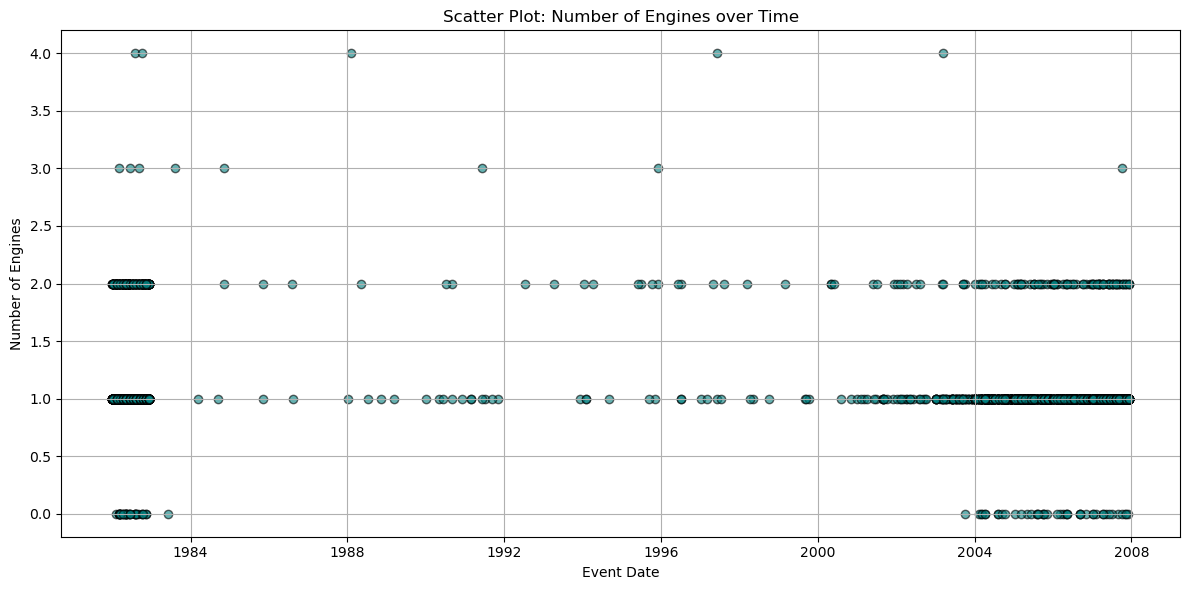

In [58]:
# Convert Event.Date to datetime format
aviation_df_filtered_cleaned["Event.Date"] = pd.to_datetime(aviation_df_filtered_cleaned["Event.Date"], errors='coerce')

# Plot a scatter plot: Event.Date vs Number.of.Engines
plt.figure(figsize=(12, 6))
plt.scatter(aviation_df_filtered_cleaned["Event.Date"], aviation_df_filtered_cleaned["Number.of.Engines"], alpha=0.6, color='teal', edgecolors='black')

# Add titles and labels
plt.title("Scatter Plot: Number of Engines over Time")
plt.xlabel("Event Date")
plt.ylabel("Number of Engines")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


The cell below will now help plot a graph to show the number of accidents vs incidents.

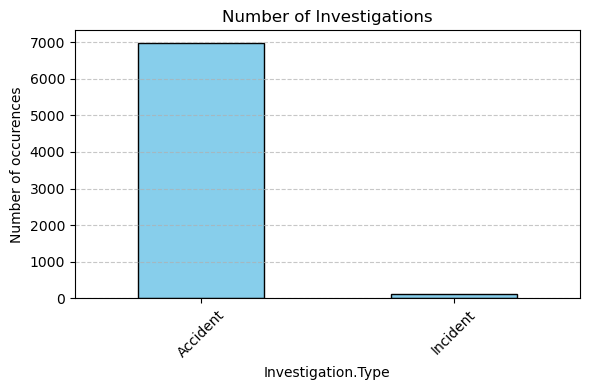

In [ ]:
investigation_counts = aviation_df_filtered_cleaned["Investigation.Type"].value_counts()

# Plot a bar graph
plt.figure(figsize=(6, 4))
investigation_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Number of Investigations")
plt.xlabel("Investigation.Type")
plt.ylabel("Number of occurences")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


In [56]:
aviation_df_filtered_cleaned["Investigation.Type"].value_counts()

Investigation.Type
Accident    6971
Incident     117
Name: count, dtype: int64

The next cell will be an attempt to count the number of aircraft categories.

In [45]:
aviation_df_filtered_cleaned["Aircraft.Category"].value_counts()


Aircraft.Category
Airplane        6187
Helicopter       669
Glider           140
Balloon           43
Gyrocraft         36
Ultralight         7
Blimp              3
Powered-Lift       2
Unknown            1
Name: count, dtype: int64

The cell below will now plot how many aircraft categories got an an event recorded.

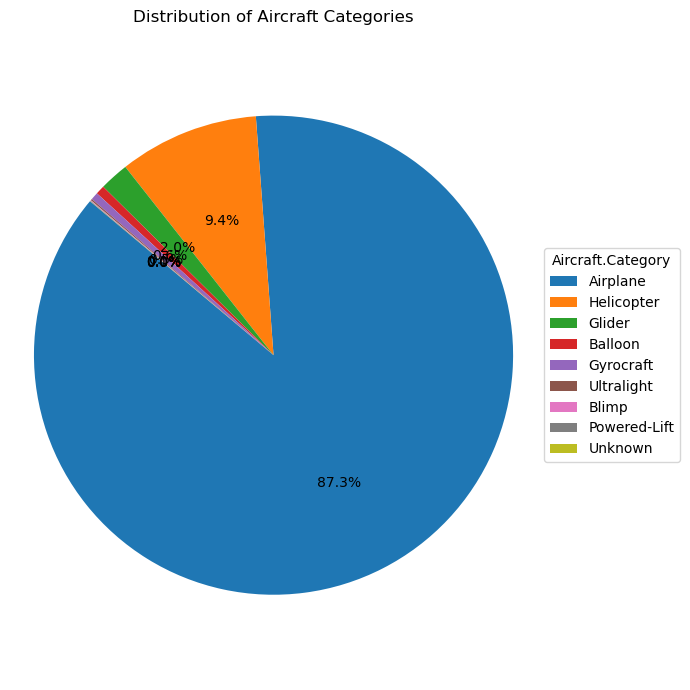

In [68]:
# Count occurrences of each aircraft category
category_counts = aviation_df_filtered_cleaned["Aircraft.Category"].value_counts()

# Creating the pie chart
plt.figure(figsize=(7, 7))
patches, texts, autotexts = plt.pie(
    category_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140
)

# Adding a legend on the side
plt.legend(patches, category_counts.index, title="Aircraft.Category", bbox_to_anchor=(1, 0.5), loc="center left")

# Title and Format
plt.title("Distribution of Aircraft Categories")
plt.axis('equal')
plt.tight_layout()

# Show the chart
plt.show()


Repeating the above two steps for Aircraft.Damage

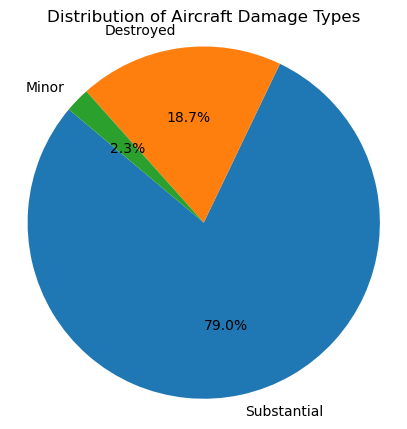

In [47]:
aviation_df_filtered_cleaned["Aircraft.damage"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(aviation_df_filtered_cleaned["Aircraft.damage"].value_counts(), labels=aviation_df_filtered_cleaned["Aircraft.damage"].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Aircraft Damage Types")
plt.axis('equal') 

# Show the chart
plt.show()

As we can see from the above pie chart, most aircrafts experienced substantial damade. This would mean costly repairs if we were to acquire them. Therefore, the safest option would be to go for the ones with minor damage hence lowering our costs and safety risks.

In [48]:
aviation_df_filtered_cleaned["Country"].value_counts()

Country
United States      7064
GULF OF MEXICO        5
Puerto Rico           4
Bahamas               3
HIGH ISLAND           2
MISSING               2
PACIFIC OCEAN         2
ATLANTIC OCEAN        1
Japan                 1
Honduras              1
Solomon Islands       1
Haiti                 1
Antarctica            1
Name: count, dtype: int64

From the above line of code we are able to observee that the United States has had the most airplane accidents. It would not be in my recommendation to purchase an aircraft form there compared to a nation like Japan or Haiti that have only had 1 incident. However, Boeing has their headquarters for anufacturing based in the United States therefore it would not prove wise to rule them out completely as majority of planes in the US that are used daily for commercial and personal purposes are from Boeing. This is wholely based on the assumption that these were domestic flights.

In [49]:
aviation_df_filtered_cleaned["Amateur.Built"].value_counts()

Amateur.Built
No     6399
Yes     689
Name: count, dtype: int64

It would also be my recommendation that the business purchases professional built aircrafts as their servicing and repairs are more in number hence easier to get engineers that can work on them. It is also easier to get pilots who are familiar with the aircrafts if you chose the professional build ones from companies like Boeing.

In [50]:
aviation_df_filtered_cleaned["Purpose.of.flight"].value_counts()

Purpose.of.flight
Personal                     4171
Instructional                1040
Unknown                       657
Business                      386
Aerial Application            333
Positioning                   116
Ferry                          82
Executive/corporate            68
Skydiving                      55
Other Work Use                 52
Aerial Observation             37
Flight Test                    29
Public Aircraft                20
Banner Tow                     13
Air Race/show                  10
Public Aircraft - State         4
Glider Tow                      4
Public Aircraft - Federal       4
External Load                   3
Public Aircraft - Local         3
Firefighting                    1
Name: count, dtype: int64

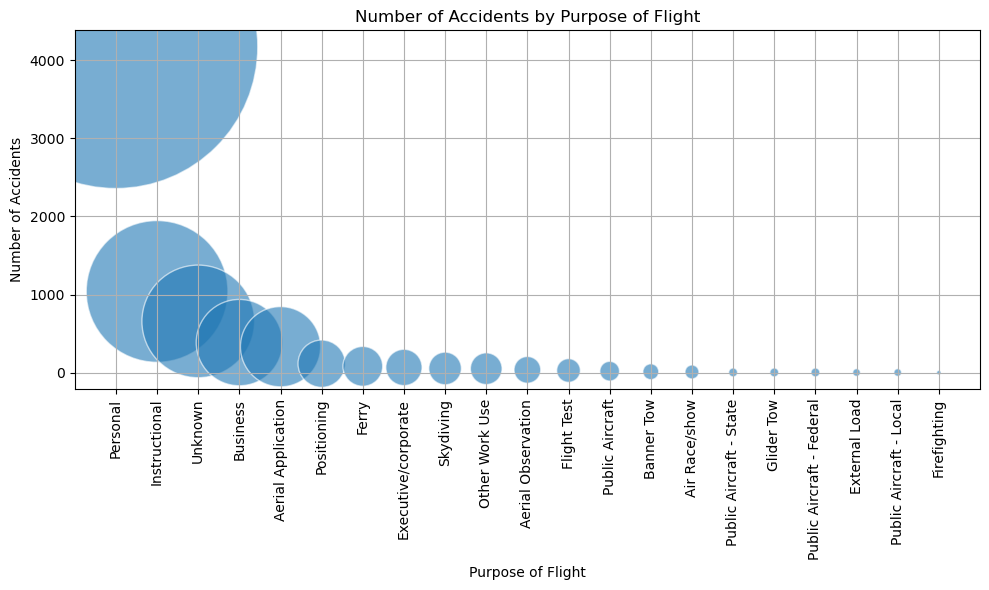

In [ ]:
aviation_df_filtered_cleaned.columns = aviation_df_filtered_cleaned.columns.str.strip()

# Count how many records per purpose of flight
purpose_counts = aviation_df_filtered_cleaned["Purpose.of.flight"].value_counts().reset_index()
purpose_counts.columns = ["Purpose", "Count"]

# Bubble chart setup
plt.figure(figsize=(10, 6))

# Plot bubbles
plt.scatter(
    x=purpose_counts["Purpose"],            
    y=purpose_counts["Count"],              
    s=purpose_counts["Count"] * 10,         
    alpha=0.6,                        
    edgecolors="w"
)

plt.title("Number of Accidents by Purpose of Flight")
plt.xlabel("Purpose of Flight")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()


From the above Bubble chart, we can clearly observe that the aircrafts with the least accidents were Fire fighting ones, and the ones with the most were Personal ones. For the purpose that the company wants, to acquire planes, tehy will still opt to choose those made for personal flights. Especially the Airbus and Boeing models.

## Recommendations
1. The business should opt for aircrafts with minor damage when purchasing or leasing depending on teh method of acquision they choose to take up. This will benefit them in terms of zero to minimal repair costs.
2. The business should opt for professionally built crafts over amateur built ones. This will benefit them as most parts depending on the make of aeroplae tend to be standardized and more easily accessble compared to amateur ones that may be specialized and probably even rare to obtain.
3. The business should source most of it's planes from the United States of America. Boeing has large manufacturing plants based in Seattle, Everet and Renton. This will make sourcing for parts and probably also commissioning of new aircrafts in future easier.
4. The business would benefit highly from sourcing planes whose main purpose of flight is personal charter for executive/corporate use or commercial. Operating crafts used for firefighting, glider towing or skydiving would not be the most profitable in the long run.